In [1]:
import numpy as np
import nba_api
from nba_api.stats.static import teams, players
from nba_api.stats.endpoints import shotchartdetail, playercareerstats

from ballDontLie.util.plotting import overlay_court_mpl, overlay_court_ply
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as ply
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
career = playercareerstats.PlayerCareerStats(player_id=201939)
detail = shotchartdetail.ShotChartDetail(player_id=201939, team_id=1610612744)

Doing this in matplotlib for convenience

(0, 425)

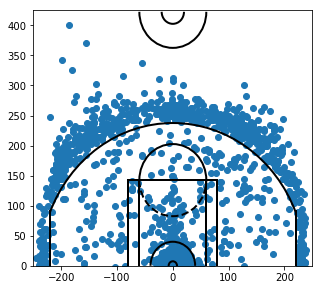

In [3]:
dfs = detail.get_data_frames()
curry_df = dfs[0]
filter_date = [True if '2015' in val[:4] or '2016' in val[:4] else False for val in curry_df['GAME_DATE']]


fig, ax = plt.subplots(1,1, figsize=(5, 4.7))
overlay_court_mpl(ax)
ax.scatter(curry_df[filter_date]['LOC_X'], curry_df[filter_date]['LOC_Y'])
ax.set_xlim([-250, 250])
ax.set_ylim([0, 425])

Trying this in plotly

In [4]:

dfs = detail.get_data_frames()
curry_df = dfs[0]
filter_2013 = [True if '2013' in val[:4] else False for val in curry_df['GAME_DATE']]
frames = []
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 3, 'easing': 'quad-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}
years = ['2013', '2014', '2015', '2016', '2017', '2018']
for year in years:
    filter_year = [True if str(year) in val[:4] else False for val in curry_df['GAME_DATE']]
    frame={'name':str(year), 'data':[]}
    frame['data'].append({'x':curry_df[filter_year]['LOC_X'].values,
                        'y':curry_df[filter_year]['LOC_Y'].values,
                        'mode':'markers',
                         'name':str(year)})
    frame['layout'] = {'title':str(year)}
    frames.append(frame)
    
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 3, 'redraw': True},
         'mode': 'immediate',
       'transition': {'duration': 3}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)
    


shot_trace = go.Scatter(x=curry_df[filter_2013]['LOC_X'].values, 
                        y=curry_df[filter_2013]['LOC_Y'].values,
                        mode='markers')
data = [shot_trace]
court_shapes = overlay_court_ply()
layout = go.Layout(showlegend=False, height=470, width=500, shapes=court_shapes,
                    xaxis={'range':[-250, 250]},
                    yaxis={'range':[0, 425]},
                    title='2013',
                    hovermode='closest',
                    updatemenus= [{'type': 'buttons',
                               'buttons': [
                                   {'label': 'Play',
                                    'method': 'animate',
                                    'args': [None, {'fromcurrent':True, 'redraw':True}]},
                                {'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate',
                                    'transition': {'duration': 0}}],
                                    'label': 'Pause',
                                'method': 'animate'
                                    }]}],
                    sliders=[sliders_dict])
fig = go.Figure(data=data, layout=layout, frames=frames)

iplot(fig, filename='curry_shotchart_2k19')
#plotly.plotly.icreate_animations(fig, filename='curryanimatino')